In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
# We want to call the CSV data.
Data = pd.DataFrame(pd.read_csv('https://raw.githubusercontent.com/DillonOuimet/ECGR_4105/main/Final_Project/winequality-red%20(1).csv', sep = ';'))

Data.insert(0,'X0',1)
features = 'X0','fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol'
feature  = 'fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol'

Data.shape

(1599, 13)

In [3]:
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respec
np.random.seed(0)
#70, 30 split.
Train, Test = train_test_split(Data, train_size = 0.8, test_size = 0.2, random_state=42)
len(Test)

320

In [4]:
# Xred = redData.loc[:, features].values
# Yred = redData.loc[:, 'quality'].values
# Ydf = pd.DataFrame(Yred)
# Xred.shape

In [5]:
mTrain = len(Train)
mTest = len(Test)

In [6]:
#This is the loss function: 
def loss(X, y, theta, m):
 """
 Compute loss for linear regression.
 Input Parameters
 ----------------
 X : 2D array where each row represent the training example and each column represent
 m= number of training examples
 n= number of features (including X_0 column of ones)
 y : 1D array of labels/target value for each traing example. dimension(1 x m)
 theta : 1D array of fitting parameters or weights. Dimension (1 x n)
 Output Parameters
 -----------------
 J : Scalar value.
 """
##First multply the X values by theta
 predictions = X.dot(theta)
#Then subtract and s
 errors = np.subtract(predictions, y)
 sqrErrors = np.square(errors)
 J = 1 / (2 * m) * np.sum(sqrErrors)
 return J

In [7]:
##This is the gradient descent function
def gd_Multi(X_train,X_test, y_train, y_test, theta, alpha, iterations, n, mTrain, mTest):
# n is the number of columns in the theta (how many variables + 1) 
 """
 Compute cost for linear regression.
 Input Parameters
 ----------------
 X : 2D array where each row represent the training example and each column represent
 m= number of training examples
 n= number of features (including X_0 column of ones)
 y : 1D array of labels/target value for each traing example. dimension(m x 1)
 theta : 1D array of fitting parameters or weights. Dimension (1 x n)
 alpha : Learning rate. Scalar value
 iterations: No of iterations. Scalar value.
 Output Parameters
 -----------------
 theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n)
 cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1)
 """
 cost_history_Train = np.zeros(iterations)
 cost_history_Test = np.zeros(iterations)
 sum_delta = np.zeros(n)
 

 for i in range(iterations):
    h = X_train.dot(theta) ##gives a m x 1 array
    errors = np.subtract(h, y_train) ## also m x 1
    
    """ 
    Here is the main difference in my code vs what was provided.
    I run this for loop n times and multiple the thetas one at a time
    This should work for a data set of any amount of explanatory variables. 
    """
    for j in range(n):             
        sum_delta[j] = (alpha / mTrain) * X_train[:,j].transpose().dot(errors); ##1 x 1 array
        theta[j] = theta[j] - sum_delta[j];     
        
    #call the loss functions
             #Training loss
    cost_history_Train[i] = loss(X_train, y_train, theta, mTrain)
             # Validation loss
    cost_history_Test[i]  = loss(X_test, y_test, theta, mTest)
 return theta, cost_history_Train, cost_history_Test

In [8]:
#define the expl. variable values train

X_0_train = Train.values[:, 0].reshape((mTrain, 1))
X_1_train = Train.values[:, 1].reshape((mTrain, 1)) # get input values from first column
X_2_train = Train.values[:, 2].reshape((mTrain, 1)) # get output values from second column
X_3_train = Train.values[:, 3].reshape((mTrain, 1)) # get output values from third column
X_4_train = Train.values[:, 4].reshape((mTrain, 1)) 
X_5_train = Train.values[:, 5].reshape((mTrain, 1)) 
X_6_train = Train.values[:, 6].reshape((mTrain, 1))
X_7_train = Train.values[:, 7].reshape((mTrain, 1)) # get input values from first column
X_8_train = Train.values[:, 8].reshape((mTrain, 1)) # get output values from second column
X_9_train = Train.values[:, 9].reshape((mTrain, 1)) # get output values from third column
X_10_train = Train.values[:, 10].reshape((mTrain, 1)) 
X_11_train = Train.values[:, 11].reshape((mTrain, 1)) 
yTrainMM = Train.values[:,12] # get output values from fourth column

#define the expl. variable values test
X_0_test = Test.values[:, 0].reshape((mTest, 1))
X_1_test = Test.values[:, 1].reshape((mTest, 1)) # get input values from first column
X_2_test = Test.values[:, 2].reshape((mTest, 1)) # get output values from second column
X_3_test = Test.values[:, 3].reshape((mTest, 1)) # get output values from third column
X_4_test = Test.values[:, 4].reshape((mTest, 1)) 
X_5_test = Test.values[:, 5].reshape((mTest, 1)) 
X_6_test = Test.values[:, 6].reshape((mTest, 1))
X_7_test = Test.values[:, 7].reshape((mTest, 1)) # get input values from first column
X_8_test = Test.values[:, 8].reshape((mTest, 1)) # get output values from second column
X_9_test = Test.values[:, 9].reshape((mTest, 1)) # get output values from third column
X_10_test = Test.values[:, 10].reshape((mTest, 1)) 
X_11_test = Test.values[:, 11].reshape((mTest, 1)) 
yTestMM = Test.values[:,12]

In [9]:
#Stack the arrays together
xTrainMM= np.hstack((X_0_train, X_1_train, X_2_train, X_3_train, X_4_train, X_5_train, X_6_train, X_7_train, X_8_train, X_9_train, X_10_train, X_11_train))
xTestMM= np.hstack((X_0_test, X_1_test, X_2_test, X_3_test, X_4_test, X_5_test,X_6_test, X_7_test, X_8_test, X_9_test, X_10_test, X_11_test))
min(yTrainMM)

3.0

In [10]:
from sklearn.preprocessing import  MinMaxScaler, StandardScaler
sc_X = StandardScaler()

TrainScaleSS = sc_X.fit_transform(xTrainMM)
TestScaleSS =  sc_X.fit_transform(xTestMM)

#Scale the data
scale = MinMaxScaler()
TrainScaleMM = scale.fit_transform(xTrainMM)
TestScaleMM  = scale.fit_transform(xTestMM)




In [11]:
N = 12
thetaQa = np.zeros(N)
iterations = 1500
alpha = .009
#I want a slightly higher alpha and more iterations
thetaQa, cost_historyQatrain, cost_historyQatest = gd_Multi( TrainScaleMM, TestScaleMM, yTrainMM, yTestMM, thetaQa, alpha, iterations, N, mTrain, mTest)

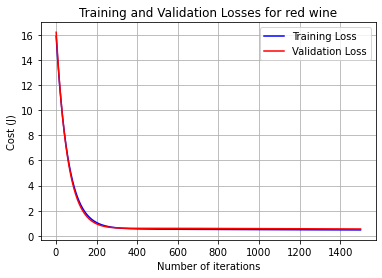

In [12]:
#plot the training and validation loss:
plt.plot(range(1, iterations + 1),cost_historyQatrain, color='blue')
plt.plot(range(1, iterations + 1),cost_historyQatest, color ='red')
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Training and Validation Losses for red wine')
plt.legend(['Training Loss', 'Validation Loss'])


In [13]:
print(thetaQa)

[0.         1.76049548 1.5439481  1.39320915 0.42884478 0.67383935
 1.13070438 0.56328928 2.51316859 3.1605868  1.19289469 2.59423313]


In [14]:
#Now try logisticRegression without scaling

In [15]:
#Import LogisticRegression from sklearn.linear_model
xTrain = xTrainMM 
xTest = xTestMM 
yTrain = yTrainMM
yTest = yTestMM


from sklearn.linear_model import LogisticRegression
#Train the data

classifier = LogisticRegression(random_state=42)
classifier.fit(xTrain, yTrain)
max(yTrain)

8.0

In [16]:
Y_predNON = classifier.predict(xTest)
max(Y_predNON)

7.0

In [17]:
from sklearn.metrics import confusion_matrix
#make the confustion matrix
cnf_matrixNON = confusion_matrix(yTest, Y_predNON, labels = [3,4,5,6,7,8])
cnf_matrixNON


array([[ 0,  0,  1,  0,  0,  0],
       [ 0,  0,  9,  1,  0,  0],
       [ 0,  0, 95, 35,  0,  0],
       [ 0,  0, 50, 81,  1,  0],
       [ 0,  0,  4, 37,  1,  0],
       [ 0,  0,  0,  5,  0,  0]], dtype=int64)

In [18]:
from sklearn import metrics

#grab the metrics
print("Accuracy:",metrics.accuracy_score(yTest, Y_predNON))
print("Precision:",metrics.precision_score(yTest, Y_predNON,average = 'weighted'))
print("Recall:",metrics.recall_score(yTest, Y_predNON,average = 'weighted'))


Accuracy: 0.553125
Precision: 0.518494496855346
Recall: 0.553125


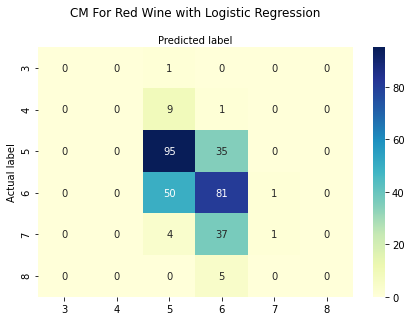

In [19]:
#Let's visualize the results of the model in the form of a co#nfusion matrix using matp
#Here, you will visualize the confusion matrix using Heatmap.
class_names=[3,4,5,6,7,8] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrixNON), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top");
plt.tight_layout()
plt.title('CM For Red Wine with Logistic Regression', y=1.1)
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
ax.set_xticklabels(class_names);
ax.set_yticklabels(class_names);

In [20]:
#LR with Scaling

In [21]:
#Train the data

classifierSS = LogisticRegression(random_state=42)
classifierSS.fit(TrainScaleSS, yTrain)

classifierMM = LogisticRegression(random_state=42)
classifierMM.fit(TrainScaleMM, yTrain)

LogisticRegression(random_state=42)

In [22]:
Y_predSS = classifierSS.predict(TestScaleSS)
Y_predMM = classifierMM.predict(TestScaleMM)
# min(Y_predSS)

In [23]:

#make the confustion matrix
cnf_matrixSS = confusion_matrix(yTest, Y_predSS, labels = [3,4,5,6,7,8])
cnf_matrixMM = confusion_matrix(yTest, Y_predMM, labels = [3,4,5,6,7,8])
cnf_matrixSS

array([[ 0,  0,  1,  0,  0,  0],
       [ 0,  1,  9,  0,  0,  0],
       [ 0,  0, 99, 31,  0,  0],
       [ 0,  0, 49, 75,  8,  0],
       [ 0,  0,  3, 31,  8,  0],
       [ 0,  0,  0,  1,  4,  0]], dtype=int64)

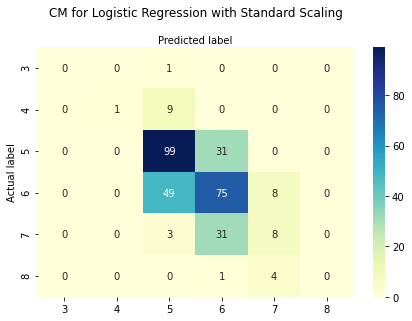

In [24]:
#Let's visualize the results of the model in the form of a co#nfusion matrix using matp
#Here, you will visualize the confusion matrix using Heatmap.
class_names=[3,4,5,6,7,8] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrixSS), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top");
plt.tight_layout()
plt.title('CM for Logistic Regression with Standard Scaling', y=1.1)
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
ax.set_xticklabels(class_names);
ax.set_yticklabels(class_names);

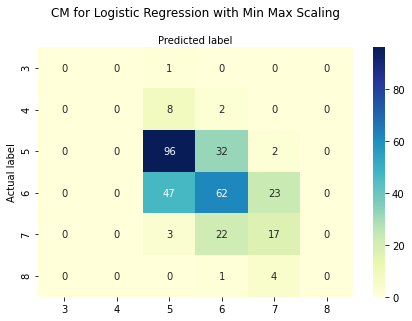

In [25]:
#Let's visualize the results of the model in the form of a co#nfusion matrix using matp
#Here, you will visualize the confusion matrix using Heatmap.
class_names=[3,4,5,6,7,8] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrixMM), annot=True, cmap="YlGnBu" ,fmt='g', xticklabels = True)
ax.xaxis.set_label_position("top");
plt.tight_layout()
plt.title('CM for Logistic Regression with Min Max Scaling', y=1.1)
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
ax.set_xticklabels(class_names);
ax.set_yticklabels(class_names);

In [26]:
#grab the metrics
AClrpl = metrics.accuracy_score(yTest, Y_predSS)
PRlrpl = metrics.precision_score(yTest, Y_predSS,average = 'weighted')
print("Accuracy:",metrics.accuracy_score(yTest, Y_predSS))
print("Precision:",metrics.precision_score(yTest, Y_predSS,average = 'weighted'))
print("Recall:",metrics.recall_score(yTest, Y_predSS,average = 'weighted'))

Accuracy: 0.571875
Precision: 0.5577406832298137
Recall: 0.571875


In [27]:
#grab the metrics
print("Accuracy:",metrics.accuracy_score(yTest, Y_predMM))
print("Precision:",metrics.precision_score(yTest, Y_predMM,average = 'weighted'))
print("Recall:",metrics.recall_score(yTest, Y_predMM,average = 'weighted'))

Accuracy: 0.546875
Precision: 0.5150343043949698
Recall: 0.546875


In [28]:
#LR using PCA and LR

In [29]:
XTot = Data.loc[:, feature].values
X_std = StandardScaler().fit_transform(XTot)

X_MM = MinMaxScaler().fit_transform(XTot)

X_std.shape

(1599, 11)

In [30]:
#Do PCA on the data using this funciton:
def PCAfunc(N,X_std):
    from sklearn.decomposition import PCA
    #I want to keep N of the components:

    pca = PCA(n_components=N)
    principalComponents = pca.fit_transform(X_std) 
    principalDf = pd.DataFrame(data = principalComponents)

    finalDataPCA = pd.concat([principalDf, Data[['quality']]], axis = 1) 



    #Split the Data:
    data_trainPCA, data_testPCA = train_test_split(finalDataPCA, train_size = 0.80, test_size = 0.2, random_state= 42)
    X_TrainPCA = data_trainPCA.loc[:, range(N)].values #The number of principle components will change. 
    Y_TrainPCA = data_trainPCA.loc[:, ['quality']].values

    X_TestPCA = data_testPCA.loc[:, range(N)].values
    Y_TestPCA = data_testPCA.loc[:, ['quality']].values

    #Train the data

    classifierPCA = LogisticRegression(random_state=0)
    classifierPCA.fit(X_TrainPCA, Y_TrainPCA.ravel())
    Y_predPCA = classifierPCA.predict(X_TestPCA)

    cnf_matrix = confusion_matrix(Y_TestPCA, Y_predPCA)
    cnf_matrix
    ac = metrics.accuracy_score(Y_TestPCA, Y_predPCA)
    pr = metrics.precision_score(Y_TestPCA, Y_predPCA,average = 'weighted')
    re = metrics.recall_score(Y_TestPCA, Y_predPCA,average = 'weighted')
    return ac, pr, re, cnf_matrix

In [31]:
comp = 11
accuracySS = np.zeros(comp)
precisionSS = np.zeros(comp)
recallSS = np.zeros(comp)

accuracyMM  = np.zeros(comp)
precisionMM = np.zeros(comp)
recallMM    = np.zeros(comp)

for N in range(comp):
   [accuracySS[N],precisionSS[N],recallSS[N], cnf_matrixSSPCA] = PCAfunc(N+1,X_std)
   [accuracyMM[N],precisionMM[N],recallMM[N], cnf_matrixMM] = PCAfunc(N+1,X_MM)
AClrPCA = accuracySS[10]
PRlrPCA = precisionSS[10]
print(recallSS[10])


0.575


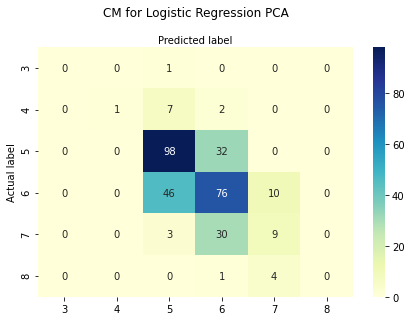

In [32]:
#Let's visualize the results of the model in the form of a co#nfusion matrix using matp
#Here, you will visualize the confusion matrix using Heatmap.
class_names=[3,4,5,6,7,8] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrixSSPCA), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top");
plt.tight_layout()
plt.title('CM for Logistic Regression PCA', y=1.1)
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
ax.set_xticklabels(class_names);
ax.set_yticklabels(class_names);

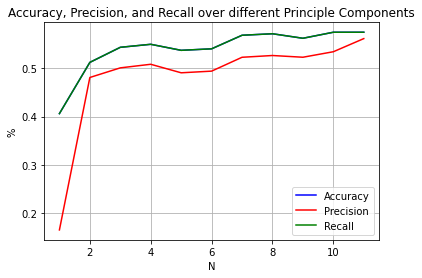

In [33]:
plt.plot(range(1, comp+1),accuracySS, color='b')
plt.plot(range(1, comp+1),precisionSS, color='r')
plt.plot(range(1, comp+1),recallSS, color='g')
plt.grid()
plt.xlabel('N')
plt.ylabel('%')
plt.title('Accuracy, Precision, and Recall over different Principle Components')
plt.legend(['Accuracy', 'Precision', 'Recall'])

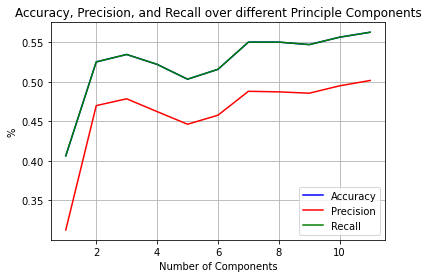

In [34]:
plt.plot(range(1, comp+1),accuracyMM, color='b')
plt.plot(range(1, comp+1),precisionMM, color='r')
plt.plot(range(1, comp+1),recallMM, color='g')
plt.grid()
plt.xlabel('Number of Components')
plt.ylabel('%')
plt.title('Accuracy, Precision, and Recall over different Principle Components')
plt.legend(['Accuracy', 'Precision', 'Recall'])

In [35]:
# LR with LDA

In [36]:
#Do LDA on the data using this funciton:
def LDAfunc(N,X,Y):
    
    #I want to keep N of the components:
    lda = LinearDiscriminantAnalysis(n_components=N)
    lda_pc = lda.fit_transform(X,Y) 
    
    PDF = pd.DataFrame(data = lda_pc)    
   
    finalDataLDA = pd.concat([PDF, Data[['quality']]], axis = 1) 
    NumCompLDA = (finalDataLDA.shape[1]) -1


    #Split the Data:
    data_trainLDA, data_testLDA = train_test_split(finalDataLDA, train_size = 0.80, test_size = 0.2, random_state= 42)
    X_TrainLDA = data_trainLDA.loc[:, range(NumCompLDA)].values #The number of principle components will change. 
    Y_TrainLDA = data_trainLDA.loc[:, ['quality']].values

    X_TestLDA = data_testLDA.loc[:, range(NumCompLDA)].values
    Y_TestLDA = data_testLDA.loc[:, ['quality']].values

    #Train the data

    classifierLDALR = LogisticRegression(random_state=42)
    classifierLDALR.fit(X_TrainLDA.reshape(-NumCompLDA,NumCompLDA), Y_TrainLDA.ravel())
    Y_predLDA = classifierLDALR.predict(X_TestLDA.reshape(-NumCompLDA,NumCompLDA))

    cnf_matrix = confusion_matrix(Y_TestLDA, Y_predLDA)
    cnf_matrix
    ac = metrics.accuracy_score(Y_TestLDA, Y_predLDA)
    pr = metrics.precision_score(Y_TestLDA, Y_predLDA,average = 'weighted')
    re = metrics.recall_score(Y_TestLDA, Y_predLDA,average = 'weighted')
    return ac, pr, re, cnf_matrix

In [37]:
Y_TotLDA = Data.loc[:, 'quality'].values
X_TotLDA = Data.loc[:, features].values

In [38]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
NUM = 5
accuracyLDA = np.zeros(NUM)
precisionLDA = np.zeros(NUM)
recallLDA = np.zeros(NUM)
for N in range(NUM):
   [accuracyLDA[N],precisionLDA[N],recallLDA[N], cnf_matrixLDA] = LDAfunc(N+1,X_TotLDA,Y_TotLDA)
AClrLDA = accuracyLDA[1]
PRlrLDA = precisionLDA[1]
print(recallLDA[1])

0.590625


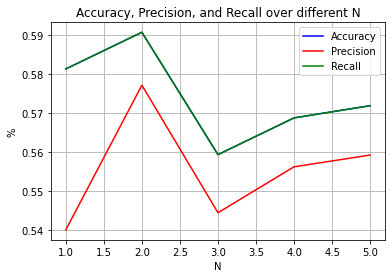

In [39]:
plt.plot(range(1, NUM+1),accuracyLDA, color='b')
plt.plot(range(1, NUM+1),precisionLDA, color='r')
plt.plot(range(1, NUM+1),recallLDA, color='g')
plt.grid()
plt.xlabel('N')
plt.ylabel('%')
plt.title('Accuracy, Precision, and Recall over different N')
plt.legend(['Accuracy', 'Precision', 'Recall'])

In [40]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda_pc = lda.fit_transform(X_std,Y_TotLDA) 
PDF = pd.DataFrame(data = lda_pc)    
   
finalDataLDA = pd.concat([PDF, Data[['quality']]], axis = 1) 
NumCompLDA = (finalDataLDA.shape[1]) -1
print(NumCompLDA)

2


In [41]:
#Split the Data:
data_trainLDA, data_testLDA = train_test_split(finalDataLDA, train_size = 0.85, test_size = 0.15, random_state= 42)
X_TrainLDA = data_trainLDA.loc[:, range(NumCompLDA)].values
Y_TrainLDA = data_trainLDA.loc[:, ['quality']].values

X_TestLDA = data_testLDA.loc[:, range(NumCompLDA)].values
Y_TestLDA = data_testLDA.loc[:, ['quality']].values

In [42]:
classifierLDALR = LogisticRegression(random_state=0)
classifierLDALR.fit(X_TrainLDA.reshape(-NumCompLDA,NumCompLDA), Y_TrainLDA.ravel())

LogisticRegression(random_state=0)

In [43]:
Y_predLDALR = classifierLDALR.predict(X_TestLDA.reshape(-NumCompLDA,NumCompLDA))
cnf_matrixLDALR = confusion_matrix(Y_TestLDA, Y_predLDALR)

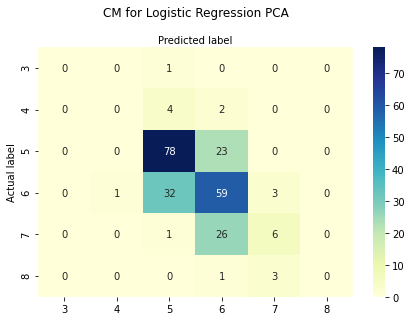

In [44]:
#Let's visualize the results of the model in the form of a co#nfusion matrix using matp
#Here, you will visualize the confusion matrix using Heatmap.
class_names=[3,4,5,6,7,8] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrixLDALR), annot=True, cmap="YlGnBu" ,fmt='g', xticklabels = True)
ax.xaxis.set_label_position("top");
plt.tight_layout()
plt.title('CM for Logistic Regression PCA', y=1.1)
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
ax.set_xticklabels(class_names);
ax.set_yticklabels(class_names);

In [45]:
print("Accuracy:",metrics.accuracy_score(Y_TestLDA, Y_predLDALR))
print("Precision:",metrics.precision_score(Y_TestLDA, Y_predLDALR,average = 'weighted'))
print("Recall:",metrics.recall_score(Y_TestLDA, Y_predLDALR,average = 'weighted'))

Accuracy: 0.5958333333333333
Precision: 0.5621220358289324
Recall: 0.5958333333333333


In [46]:
#NB with SS and MM

In [47]:
from sklearn.naive_bayes import GaussianNB
#run the NB classifier
classifierGausNON = GaussianNB()
classifierGausMM = GaussianNB()
classifierGausSS = GaussianNB()

classifierGausNON.fit(xTrain, yTrain)
classifierGausMM.fit(TrainScaleMM, yTrain)
classifierGausSS.fit(TrainScaleSS, yTrain)

GaussianNB()

In [48]:
Y_predNBNON = classifierGausNON.predict(xTest)
Y_predNBSS = classifierGausSS.predict(TestScaleSS)
Y_predNBMM = classifierGausMM.predict(TestScaleMM)

In [49]:
cmNBNON = confusion_matrix(yTest, Y_predNBNON, labels = [3,4,5,6,7,8])
cmNBSS = confusion_matrix(yTest, Y_predNBSS, labels = [3,4,5,6,7,8])
cmNBMM = confusion_matrix(yTest, Y_predNBMM, labels = [3,4,5,6,7,8])

In [50]:
print("Accuracy:",metrics.accuracy_score(yTest, Y_predNBNON))
print("Precision:",metrics.precision_score(yTest, Y_predNBNON,average = 'weighted'))
print("Recall:",metrics.recall_score(yTest, Y_predNBNON,average = 'weighted'))
ACnbPL = metrics.accuracy_score(yTest, Y_predNBNON)
PRnbPL = metrics.precision_score(yTest, Y_predNBNON,average = 'weighted')

Accuracy: 0.55
Precision: 0.5423266539440204
Recall: 0.55


In [51]:
print("Accuracy:",metrics.accuracy_score(yTest, Y_predNBSS))
print("Precision:",metrics.precision_score(yTest, Y_predNBSS,average = 'weighted'))
print("Recall:",metrics.recall_score(yTest, Y_predNBSS,average = 'weighted'))

Accuracy: 0.540625
Precision: 0.5343435246439002
Recall: 0.540625


In [52]:
print("Accuracy:",metrics.accuracy_score(yTest, Y_predNBMM))
print("Precision:",metrics.precision_score(yTest, Y_predNBMM,average = 'weighted'))
print("Recall:",metrics.recall_score(yTest, Y_predNBMM,average = 'weighted'))

Accuracy: 0.5
Precision: 0.5705594198140069
Recall: 0.5


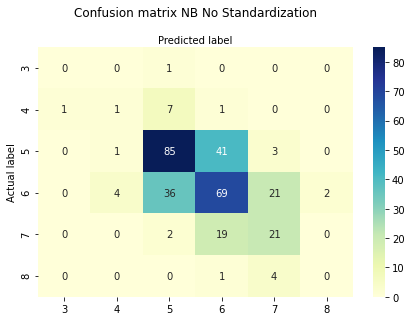

In [53]:
#Let's visualize the results of the model in the form of a co#nfusion matrix using matp
#Here, you will visualize the confusion matrix using Heatmap.
class_names=[3,4,5,6,7,8] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cmNBNON), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top");
plt.tight_layout()
plt.title('Confusion matrix NB No Standardization', y=1.1)
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
ax.set_xticklabels(class_names);
ax.set_yticklabels(class_names);

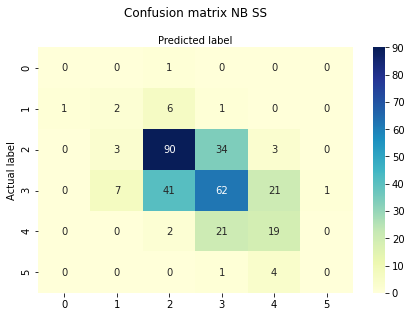

In [54]:
#Let's visualize the results of the model in the form of a co#nfusion matrix using matp
#Here, you will visualize the confusion matrix using Heatmap.
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cmNBSS), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top");
plt.tight_layout()
plt.title('Confusion matrix NB SS', y=1.1)
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

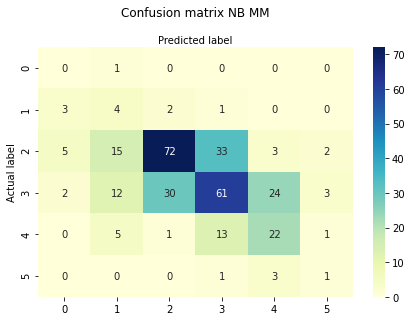

In [55]:
#Let's visualize the results of the model in the form of a co#nfusion matrix using matp
#Here, you will visualize the confusion matrix using Heatmap.
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cmNBMM), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top");
plt.tight_layout()
plt.title('Confusion matrix NB MM', y=1.1)
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [56]:
# GB with LDA

In [57]:
#Split the Data:
data_trainLDAGB, data_testLDAGB = train_test_split(finalDataLDA, train_size = 0.8, test_size = 0.2, random_state= 42)
X_TrainLDA = data_trainLDA.loc[:, range(NumCompLDA)].values
Y_TrainLDA = data_trainLDA.loc[:, ['quality']].values

X_TestLDA = data_testLDA.loc[:, range(NumCompLDA)].values
Y_TestLDA = data_testLDA.loc[:, ['quality']].values

In [58]:
#Apply Gaussian Naive Bayes theory
classifierGausLDA = GaussianNB()
#I have to reshape these using .reshape() and .ravel()
classifierGausLDA.fit(X_TrainLDA.reshape(-NumCompLDA, NumCompLDA), Y_TrainLDA.ravel())

GaussianNB()

In [59]:
Y_PredLDAGB = classifierGausLDA.predict(X_TestLDA.reshape(-NumCompLDA,NumCompLDA))

In [60]:
cnf_matrixLDANB = confusion_matrix(Y_TestLDA, Y_PredLDAGB)

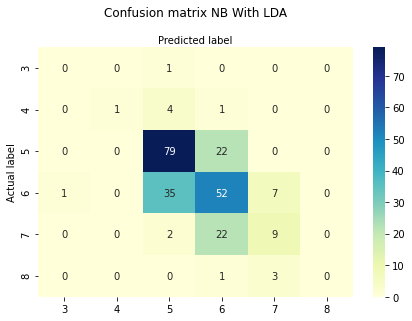

In [61]:
#Let's visualize the results of the model in the form of a co#nfusion matrix using matp
#Here, you will visualize the confusion matrix using Heatmap.
class_names=[3,4,5,6,7,8] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrixLDANB), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top");
plt.tight_layout()
plt.title('Confusion matrix NB With LDA', y=1.1)
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
ax.set_xticklabels(class_names);
ax.set_yticklabels(class_names);

In [62]:
print("Accuracy:" ,metrics.accuracy_score (Y_TestLDA, Y_PredLDAGB))
print("Precision:",metrics.precision_score(Y_TestLDA, Y_PredLDAGB,average = 'weighted'))
print("Recall:"   ,metrics.recall_score   (Y_TestLDA, Y_PredLDAGB,average = 'weighted'))

ACnbLDA = metrics.accuracy_score (Y_TestLDA, Y_PredLDAGB)
PRnbLDA = metrics.precision_score(Y_TestLDA, Y_PredLDAGB,average = 'weighted')



Accuracy: 0.5875
Precision: 0.5749245457208547
Recall: 0.5875


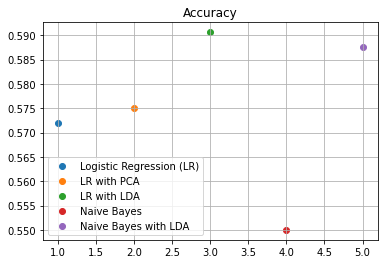

In [63]:
labels = ['Logistic Regression (LR)', 'LR with PCA', 'LR with LDA','Naive Bayes','Naive Bayes with LDA']
plt.scatter(1,AClrpl)
plt.scatter(2, AClrPCA)
plt.scatter(3, AClrLDA)
plt.scatter(4, ACnbPL)
plt.scatter(5, ACnbLDA)
plt.title('Accuracy');
plt.legend(labels, loc = 'lower left');
plt.grid()

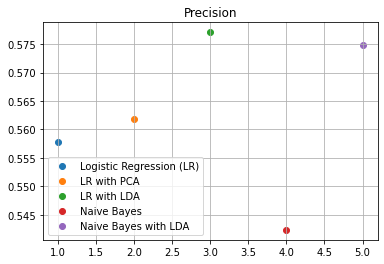

In [64]:
labels = ['Logistic Regression (LR)', 'LR with PCA', 'LR with LDA','Naive Bayes','Naive Bayes with LDA']
plt.scatter(1,PRlrpl)
plt.scatter(2, PRlrPCA)
plt.scatter(3, PRlrLDA)
plt.scatter(4, PRnbPL)
plt.scatter(5, PRnbLDA)
plt.title('Precision');
plt.legend(labels, loc = 'lower left');
plt.grid()

In [65]:
#Stack the arrays together
Y_TotLDALR = Data.loc[:, 'quality'].values
X_TotLDALR = Data.loc[:, features].values



In [66]:
#Linear Regression no feature extraction

In [67]:
TrainScaleMM = scale.fit_transform(xTrainMM)
TestScaleMM  = scale.fit_transform(xTestMM)

In [68]:
from sklearn.linear_model import LinearRegression

modelMM = LinearRegression()
modelMM.fit(TrainScaleMM, yTrainMM)

LinearRegression()

In [69]:
r_sq = modelMM.score(TrainScaleMM, yTrainMM)
print('coefficient of determination:', r_sq)
print('intercept:', modelMM.intercept_)

print('Coefficients:', modelMM.coef_)

coefficient of determination: 0.347992619352986
intercept: 5.660730898087256
Coefficients: [ 0.          0.26086427 -1.46190447 -0.14082146  0.09583894 -1.08209539
  0.3770314  -1.03137905 -0.1409887  -0.49998342  1.37110974  1.83228219]


In [70]:
Y_predMM = modelMM.predict(TestScaleMM)
y_DiffMM = sum(abs(yTestMM-Y_predMM))
print(y_DiffMM)

160.57651326833866


In [71]:
#Do LDA on the data using this funciton:
N=2;
#I want to keep N of the components:
lda = LinearDiscriminantAnalysis(n_components=N)
lda_pc = lda.fit_transform(X_TotLDALR,Y_TotLDALR) 
    
PDF = pd.DataFrame(data = lda_pc)    
   
finalDataLDA = pd.concat([PDF, Data[['quality']]], axis = 1) 
NumCompLDA = (finalDataLDA.shape[1]) -1


    #Split the Data:
data_trainLDA, data_testLDA = train_test_split(finalDataLDA, train_size = 0.8, test_size = 0.2, random_state= 42)
X_TrainLDA = data_trainLDA.loc[:, range(NumCompLDA)].values #The number of principle components will change. 
Y_TrainLDA = data_trainLDA.loc[:, ['quality']].values

X_TestLDA = data_testLDA.loc[:, range(NumCompLDA)].values
Y_TestLDA = data_testLDA.loc[:, ['quality']].values
    
X_0_train = X_TrainLDA[:, 0].reshape((mTrain, 1))
X_1_train = X_TrainLDA[:, 1].reshape((mTrain, 1)) # get input values from first column
Y_TrainLDA # get output values from fourth column

    #define the expl. variable values test
X_0_test = X_TestLDA[:, 0].reshape((mTest, 1))
X_1_test = X_TestLDA[:, 1].reshape((mTest, 1)) # get input values from first colum
Y_TestLDA

    
xTrainLDA= np.hstack((X_0_train, X_1_train))
xTestLDA = np.hstack((X_0_test, X_1_test))  

In [72]:
scale = MinMaxScaler()
TrainScaleLDA = scale.fit_transform(xTrainLDA)
TestScaleLDA  = scale.fit_transform(xTestLDA)

In [73]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(TrainScaleLDA, Y_TrainLDA)

LinearRegression()

In [74]:
r_sq = model.score(TrainScaleLDA, Y_TrainLDA)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)

print('slope:', model.coef_)


coefficient of determination: 0.34721015714465897
intercept: [7.72166112]
slope: [[-3.17050677 -0.48847622]]


In [75]:
Y_predLDA = model.predict(TestScaleLDA)
y_DiffLDA = sum(abs(Y_TestLDA-Y_predLDA))
print(y_DiffLDA)

[162.9808201]


In [76]:
#LDA With 1 Comp

In [77]:
N=1;
#I want to keep N of the components:
lda = LinearDiscriminantAnalysis(n_components=N)
lda_pc = lda.fit_transform(X_TotLDALR,Y_TotLDALR) 
    
PDF = pd.DataFrame(data = lda_pc)    
   
finalDataLDA = pd.concat([PDF, Data[['quality']]], axis = 1) 
NumCompLDA = (finalDataLDA.shape[1]) -1


    #Split the Data:
data_trainLDA, data_testLDA = train_test_split(finalDataLDA, train_size = 0.8, test_size = 0.2, random_state= 42)
X_TrainLDA1 = data_trainLDA.loc[:, range(NumCompLDA)].values #The number of principle components will change. 
Y_TrainLDA1 = data_trainLDA.loc[:, ['quality']].values

X_TestLDA = data_testLDA.loc[:, range(NumCompLDA)].values
Y_TestLDA1 = data_testLDA.loc[:, ['quality']].values
    
X_0_train = X_TrainLDA[:, 0].reshape((mTrain, 1))
Y_TrainLDA1 # get output values from fourth column

    #define the expl. variable values test
X_0_test = X_TestLDA[:, 0].reshape((mTest, 1))


    
xTrainLDA1= ((X_0_train))
xTestLDA1 = ((X_0_test)) 

In [78]:
scale = MinMaxScaler()
TrainScaleLDA1 = scale.fit_transform(xTrainLDA1)
TestScaleLDA1  = scale.fit_transform(xTestLDA1)

model1 = LinearRegression()
model1.fit(TrainScaleLDA1, Y_TrainLDA1)

r_sq1 = model1.score(TrainScaleLDA1, Y_TrainLDA1)
print('coefficient of determination with 1 comp.:', r_sq1)
print('intercept:', model1.intercept_)

print('slope:', model1.coef_)

Y_predLDA1 = model1.predict(TestScaleLDA1)
y_DiffLDA1 = sum(abs(Y_TestLDA1-Y_predLDA1))
print('Error', y_DiffLDA1)

coefficient of determination with 1 comp.: 0.34370028879642534
intercept: [7.54386099]
slope: [[-3.1715395]]
Error [164.6296106]


In [79]:
#SVR with MM
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

In [80]:
regr = make_pipeline(MinMaxScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(xTrain, yTrainMM)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('svr', SVR(epsilon=0.2))])

In [81]:
Y_PredSVR = regr.predict(xTest)
y_DiffSVR = sum(abs(yTestMM-Y_PredSVR))
print('Error', y_DiffSVR)

print(y_DiffSVR)

Error 152.72161601873444
152.72161601873444


In [82]:
#SVR with SS
regr = make_pipeline(StandardScaler(), SVR(C=1.4, epsilon=0.2))
regr.fit(xTrainMM, yTrainMM)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=1.4, epsilon=0.2))])

In [83]:
Y_PredSVR = regr.predict(xTestMM)
y_DiffSVR = sum(abs(yTestMM-Y_PredSVR))
print('Error', y_DiffSVR)

print(y_DiffSVR)

Error 147.42223620825644
147.42223620825644
